In [1]:
'''
Segment the OASIS brain data set with an Improved UNet.

@author Aghnia Prawira (45610240)
'''

import data_processing as dp
import improved_unet as iu
from importlib import reload
reload(dp)
reload(iu)

import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


Tensorflow version: 2.1.0
Tensorflow version: 2.1.0


In [2]:
dp.test()
iu.test()

Testing data processing.
Testing improved unet.


In [3]:
# Set path to dataset
dataset_path = "keras_png_slices_data/"

seg_test_path = dataset_path + "keras_png_slices_seg_test/"
seg_train_path = dataset_path + "keras_png_slices_seg_train/"
seg_val_path = dataset_path + "keras_png_slices_seg_validate/"
test_path = dataset_path + "keras_png_slices_test/"
train_path = dataset_path + "keras_png_slices_train/"
val_path = dataset_path + "keras_png_slices_validate/"

In [4]:
# Load images
reload(dp)
seg_test = dp.load_seg(seg_test_path)
seg_train = dp.load_seg(seg_train_path)
seg_val = dp.load_seg(seg_val_path)
test = dp.load_image(test_path)
train = dp.load_image(train_path)
val = dp.load_image(val_path)

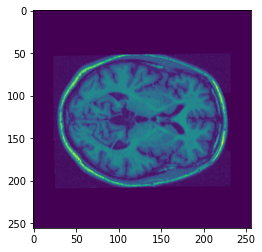

In [5]:
plt.imshow(test[0])

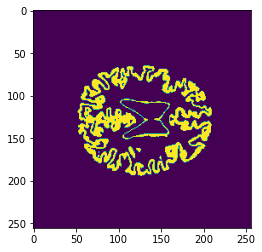

In [6]:
plt.imshow(seg_test[0][:,:,2])

In [7]:
# One hot encode labels
# seg_test = dp.one_hot_encode(seg_test)

In [8]:
# seg_train = dp.one_hot_encode(seg_train)

In [9]:
# seg_val = dp.one_hot_encode(seg_val)

In [10]:
# plt.imshow(seg_train[0][:,:,2])

In [11]:
print(np.array(train).shape)
print(np.array(seg_train).shape)

(200, 256, 256, 1)
(200, 256, 256, 4)


In [12]:
reload(iu)
# Generate improved unet model
model = iu.unet()

Tensorflow version: 2.1.0
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 256, 256, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 16) 2320        leaky_re_lu_1[0][0]              
__________________________________________________________________

In [13]:
# Compile the model
reload(iu)
# model.compile(optimizer='adam', 
#               loss='binary_crossentropy', metrics=[iu.dice_coefficient_avg])

model.compile(optimizer='adam', 
              loss=iu.dice_loss, metrics=[iu.dice_coefficient_avg])

Tensorflow version: 2.1.0


In [14]:
# Train the model
history = model.fit(np.array(train), np.array(seg_train), 
                    batch_size=32, epochs=200, 
                    validation_data=(np.array(val), np.array(seg_val)))

Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 9s 47ms/step - loss: 0.5929 - dice_coefficient_avg: 0.4093 - val_loss: 0.7234 - val_dice_coefficient_avg: 0.2766
Epoch 2/200
200/200 [==============================] - 2s 12ms/step - loss: 0.6021 - dice_coefficient_avg: 0.4007 - val_loss: 0.5728 - val_dice_coefficient_avg: 0.4269
Epoch 3/200
200/200 [==============================] - 2s 12ms/step - loss: 0.5608 - dice_coefficient_avg: 0.4385 - val_loss: 0.5232 - val_dice_coefficient_avg: 0.4768
Epoch 4/200
200/200 [==============================] - 2s 12ms/step - loss: 0.5080 - dice_coefficient_avg: 0.4957 - val_loss: 0.4566 - val_dice_coefficient_avg: 0.5433
Epoch 5/200
200/200 [==============================] - 2s 12ms/step - loss: 0.3085 - dice_coefficient_avg: 0.7084 - val_loss: 0.1470 - val_dice_coefficient_avg: 0.8544
Epoch 6/200
200/200 [==============================] - 2s 12ms/step - loss: 0.1374 - dice_coefficient_avg: 0.8640 

200/200 [==============================] - 2s 12ms/step - loss: 0.0854 - dice_coefficient_avg: 0.9147 - val_loss: 0.0842 - val_dice_coefficient_avg: 0.9157
Epoch 50/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0849 - dice_coefficient_avg: 0.9153 - val_loss: 0.0841 - val_dice_coefficient_avg: 0.9159
Epoch 51/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0845 - dice_coefficient_avg: 0.9154 - val_loss: 0.0837 - val_dice_coefficient_avg: 0.9163
Epoch 52/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0841 - dice_coefficient_avg: 0.9159 - val_loss: 0.0858 - val_dice_coefficient_avg: 0.9139
Epoch 53/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0852 - dice_coefficient_avg: 0.9148 - val_loss: 0.0859 - val_dice_coefficient_avg: 0.9141
Epoch 54/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0848 - dice_coefficient_avg: 0.9154 - val_loss: 0.0845 - val_dice_coefficient_avg: 0.9155

200/200 [==============================] - 2s 12ms/step - loss: 0.0684 - dice_coefficient_avg: 0.9310 - val_loss: 0.0910 - val_dice_coefficient_avg: 0.9090
Epoch 98/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0682 - dice_coefficient_avg: 0.9315 - val_loss: 0.0888 - val_dice_coefficient_avg: 0.9112
Epoch 99/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0678 - dice_coefficient_avg: 0.9318 - val_loss: 0.0905 - val_dice_coefficient_avg: 0.9094
Epoch 100/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0668 - dice_coefficient_avg: 0.9329 - val_loss: 0.0915 - val_dice_coefficient_avg: 0.9084
Epoch 101/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0664 - dice_coefficient_avg: 0.9340 - val_loss: 0.0910 - val_dice_coefficient_avg: 0.9091
Epoch 102/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0657 - dice_coefficient_avg: 0.9345 - val_loss: 0.0900 - val_dice_coefficient_avg: 0.9

200/200 [==============================] - 2s 12ms/step - loss: 0.0484 - dice_coefficient_avg: 0.9516 - val_loss: 0.0997 - val_dice_coefficient_avg: 0.9005
Epoch 146/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0480 - dice_coefficient_avg: 0.9518 - val_loss: 0.0993 - val_dice_coefficient_avg: 0.9007
Epoch 147/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0476 - dice_coefficient_avg: 0.9522 - val_loss: 0.1005 - val_dice_coefficient_avg: 0.8996
Epoch 148/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0477 - dice_coefficient_avg: 0.9523 - val_loss: 0.0990 - val_dice_coefficient_avg: 0.9011
Epoch 149/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0471 - dice_coefficient_avg: 0.9530 - val_loss: 0.0996 - val_dice_coefficient_avg: 0.9006
Epoch 150/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0468 - dice_coefficient_avg: 0.9530 - val_loss: 0.1004 - val_dice_coefficient_avg: 0

200/200 [==============================] - 2s 12ms/step - loss: 0.0376 - dice_coefficient_avg: 0.9623 - val_loss: 0.1052 - val_dice_coefficient_avg: 0.8948
Epoch 194/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0374 - dice_coefficient_avg: 0.9626 - val_loss: 0.1054 - val_dice_coefficient_avg: 0.8946
Epoch 195/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0374 - dice_coefficient_avg: 0.9627 - val_loss: 0.1055 - val_dice_coefficient_avg: 0.8945
Epoch 196/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0374 - dice_coefficient_avg: 0.9624 - val_loss: 0.1050 - val_dice_coefficient_avg: 0.8950
Epoch 197/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0371 - dice_coefficient_avg: 0.9630 - val_loss: 0.1047 - val_dice_coefficient_avg: 0.8954
Epoch 198/200
200/200 [==============================] - 2s 12ms/step - loss: 0.0369 - dice_coefficient_avg: 0.9633 - val_loss: 0.1056 - val_dice_coefficient_avg: 0

In [15]:
test_loss, test_acc = model.evaluate(np.array(test), np.array(seg_test), verbose=2)
print(test_acc)

0.8933120369911194


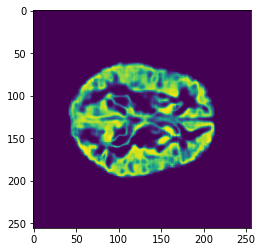

In [16]:
prediction = model.predict(np.array(test))
plt.imshow(prediction[4][:,:,2])

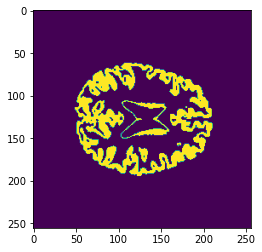

In [17]:
plt.imshow(seg_test[5][:,:,2])

In [18]:
reload(iu)
print(iu.dice_loss(np.array(seg_test), np.array(prediction)))
print(iu.dice_coefficient(np.array(seg_test), np.array(prediction)))

Tensorflow version: 2.1.0
tf.Tensor(0.10654104, shape=(), dtype=float32)
tf.Tensor(
[0.8628482  0.8952536  0.890499   0.9021691  0.8974786  0.8901439
 0.91176915 0.9008726  0.88812983 0.8992219  0.8817571  0.9004735
 0.89519316 0.8973496  0.9124292  0.91170317 0.9040453  0.86794823
 0.8966532  0.906653   0.8798714  0.90011823 0.88215953 0.8805539
 0.9094864  0.8730251  0.8770853  0.8970988  0.90952986 0.88462096
 0.86558527 0.9089556  0.8980483  0.91363    0.912061   0.9004192
 0.8675568  0.9028938  0.8945296  0.90377176 0.89617926 0.90247285
 0.8597334  0.88334435 0.8878383  0.8983053  0.88776344 0.90932304
 0.8928792  0.9115857  0.90032154 0.91224957 0.8947383  0.8871787
 0.9030249  0.8836743  0.9141762  0.9022119  0.89673024 0.90307504
 0.9006538  0.90428776 0.8941799  0.8934577  0.88946724 0.88958585
 0.9102681  0.8672902  0.9080441  0.9051149  0.89481705 0.9156249
 0.8899189  0.8823908  0.91667914 0.9219739  0.8765539  0.9083389
 0.8726597  0.88724023 0.90312684 0.8903484  0.89959